In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
import seaborn as sns

In [10]:
df=pd.read_csv('all.csv')

In [120]:
df.head()

,Transcation Date,Called Number,Called Network,Duration(HH:MM:SS),Units,Amount(INR),Call Type,Duration_seconds,Hour,Month,Day of Week
0,2019-01-31 16:50:33,9947416167,Others,00:12:18,13,15.6,LL STD Call,738.0,16,1,Thu
1,2019-01-27 17:08:57,9847764943,Others,00:01:47,2,0.0,LL STD Call,107.0,17,1,Sun
2,2019-01-24 10:01:28,9947416167,Others,00:04:57,5,6.0,LL STD Call,297.0,10,1,Thu
3,2019-01-20 10:15:23,9605578399,Others,00:06:26,7,0.0,LL Local Call,386.0,10,1,Sun
4,2019-01-16 16:41:34,2505357,BSNL LL,00:00:31,1,0.0,LL Local Call,31.0,16,1,Wed


In [52]:
#df.groupby('Called Number').sum().sort_values(by='Duration1')

In [53]:
#df[df['Called Number']==9447847807]

In [69]:
#print(df['Call Type'].unique())

In [54]:
#df[df['Call Type']=='LL STD Call']

In [73]:
df['Duration(HH:MM:SS)']=pd.to_timedelta(df['Duration(HH:MM:SS)'])

In [70]:
df['Duration_seconds'] = pd.to_timedelta(df['Duration(HH:MM:SS)']).astype('timedelta64[s]')

In [65]:
df['Transcation Date']=pd.to_datetime(df['Transcation Date'])

In [75]:
time=df['Transcation Date'].iloc[0]

In [81]:
df['Hour'] = df['Transcation Date'].apply(lambda time: time.hour)
df['Month'] = df['Transcation Date'].apply(lambda time: time.month)
df['Day of Week'] = df['Transcation Date'].apply(lambda time: time.dayofweek)

In [84]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [85]:
df['Day of Week'] = df['Day of Week'].map(dmap)

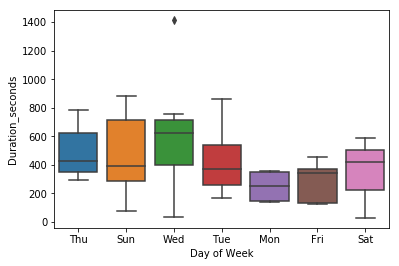

In [119]:
sns.boxplot(x='Day of Week',y='Duration_seconds',data=df)

In [98]:
new1=df.groupby(by=['Day of Week','Hour']).sum()['Duration_seconds'].unstack()

In [99]:
new1.head()

Hour,9,10,11,14,16,17,18,19,20,21,22
Day of Week,,,,,,,,,,,
Fri,343.0,NaN,NaN,129.0,NaN,NaN,NaN,588.0,NaN,369.0,NaN
Mon,501.0,NaN,NaN,NaN,NaN,137.0,356.0,NaN,NaN,NaN,NaN
Sat,NaN,616.0,NaN,NaN,NaN,421.0,NaN,NaN,NaN,NaN,NaN
Sun,884.0,1005.0,395.0,NaN,NaN,3148.0,NaN,NaN,549.0,NaN,NaN
Thu,694.0,1228.0,NaN,NaN,738.0,NaN,NaN,NaN,NaN,NaN,781.0


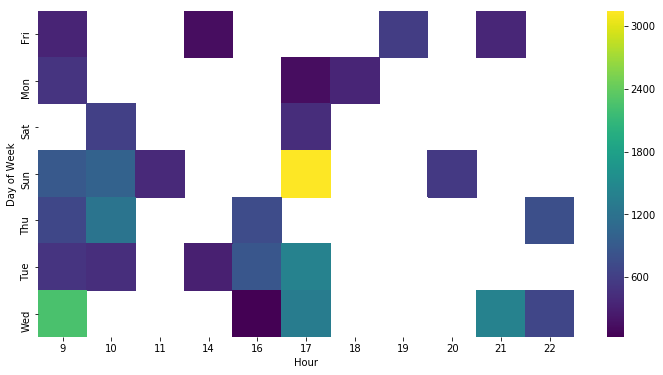

In [102]:
plt.figure(figsize=(12,6))
sns.heatmap(new1,cmap='viridis')

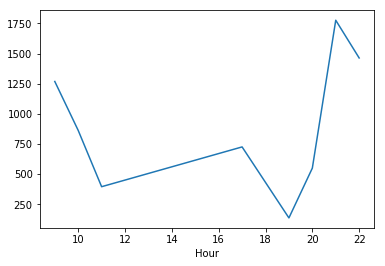

In [117]:
df[df['Called Number']==9447847807].groupby('Hour')['Duration_seconds'].sum().plot()

In [ ]:
sns.barplot(x='Day of Week',y='Duration_seconds',data=df)